# 如何得到一个圆形的边界呢?
![cir](img/cir.png)

# 添加多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:,1] ** 2 < 1.5, dtype="int")

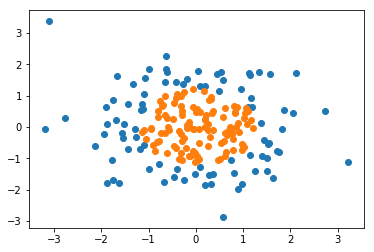

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

## 使用逻辑回归

In [4]:
from playML.LogisticRegression import LogisticRegression

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [6]:
log_reg.score(X, y)

0.605

In [7]:
def plot_decision_boundry(model, axis):
    # meshgrid 可以参考项目03-第3章JupyterNotebook_numpy和map/numpy.ipynb
    # 其实就是分别生成按行看的矩阵和 按列看的矩阵
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    return

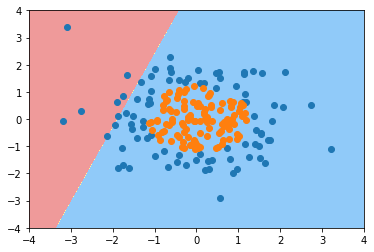

In [8]:
plot_decision_boundry(log_reg, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [12]:
def PolyLogReg(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std", StandardScaler()),
        ("logreg", LogisticRegression())
    ])

In [13]:
ploy_log_reg = PolyLogReg(2)

In [14]:
ploy_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression())])

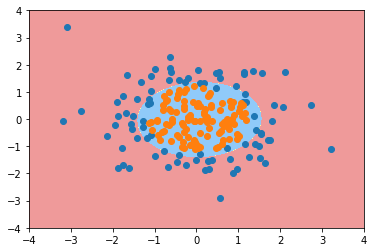

In [15]:
plot_decision_boundry(ploy_log_reg, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [16]:
ploy_log_reg.score(X,y)

0.915

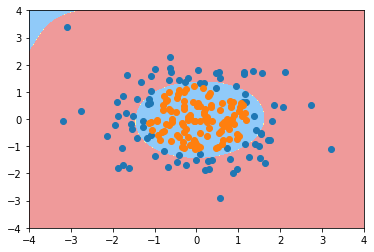

In [17]:
ploy_log_reg2 = PolyLogReg(20)
ploy_log_reg2.fit(X, y)
plot_decision_boundry(ploy_log_reg2, [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

## 不规则的图像预示着过拟合发生
### 解决办法就是减少degree或者正则化
### 下面看下sklearn中如何解决过拟合